In [74]:
# Import Dependencies 
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

In [75]:
df = pd.read_csv("../Resources/College_Data.csv")
df.head()

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [76]:
# Drop the unbeneficial Column
df =df.drop(columns=["Name"])
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [77]:
df.dtypes

Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [78]:
# Replace Yes and No values with 1, 0
df.Private.replace(('Yes', 'No'), (1, 0), inplace=True)


In [79]:
# Print DataFrame to check changes on "Private"
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [80]:
#  To find columns that have null values 
for column in df.columns:
    print(f"column {column} have {df[column].isnull().sum()} null values")

column Private have 0 null values
column Apps have 0 null values
column Accept have 0 null values
column Enroll have 0 null values
column Top10perc have 0 null values
column Top25perc have 0 null values
column F.Undergrad have 0 null values
column P.Undergrad have 0 null values
column Outstate have 0 null values
column Room.Board have 0 null values
column Books have 0 null values
column Personal have 0 null values
column PhD have 0 null values
column Terminal have 0 null values
column S.F.Ratio have 0 null values
column perc.alumni have 0 null values
column Expend have 0 null values
column Grad.Rate have 0 null values


In [81]:
# Use Pandas to create DataFrame named X
X = pd.DataFrame(df)
X.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [82]:
# Standardize all of the data from the X DataFrame. 
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 6.12553050e-01, -3.46881819e-01, -3.21205453e-01, ...,
        -8.67574189e-01, -5.01910084e-01, -3.18251941e-01],
       [ 6.12553050e-01, -2.10884040e-01, -3.87029908e-02, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51261842e-01],
       [ 6.12553050e-01, -4.06865631e-01, -3.76317928e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.67766793e-01],
       ...,
       [ 6.12553050e-01, -2.33895071e-01, -4.23771558e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.59029170e-01],
       [ 6.12553050e-01,  1.99171118e+00,  1.77256262e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.95359460e+00],
       [ 6.12553050e-01, -3.26765760e-03, -6.68715889e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.95359460e+00]])

In [83]:
# Applying PCA to reduce dimensions to 90%
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [84]:
X_pca

array([[-1.62770758,  0.25556542, -0.10613128],
       [-2.00476648, -1.19550411,  2.92245904],
       [-1.201275  , -1.46392559, -0.28593139],
       ...,
       [-0.6592899 , -0.39281574,  0.05710434],
       [ 8.15908349, -0.85984934,  2.02034553],
       [-0.46426477,  0.06968405, -1.21814485]])

In [85]:
# Transform PCA data to a DataFrame
pcs_df  = pd.DataFrame(data=X_pca, columns=["PC 1", "PC 2","PC 3"])
pcs_df.head()

,PC 1,PC 2,PC 3
0,-1.627708,0.255565,-0.106131
1,-2.004766,-1.195504,2.922459
2,-1.201275,-1.463926,-0.285931
3,3.232372,-2.151150,-0.206274
4,-2.130789,-0.547369,2.228227


In [86]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.30332963, 0.2808937 , 0.066088  ])

In [87]:
# Create an elbow curve to find the best value for K, and use the pcs_df DataFrame.
# Find the best value for K
inertia = []
z = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
	km = KMeans(n_clusters=i, random_state=0)
	km.fit(pcs_df)
	inertia.append(km.inertia_)

# Create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

In [88]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=135)

In [89]:
tsne_features = tsne.fit_transform(X)

In [90]:
tsne_features.shape

(777, 2)

In [91]:
# Prepare to plot the dataset

# The first column of transformed features
X['x'] = tsne_features[:,0]

# The second column of transformed features
X['y'] = tsne_features[:,1]

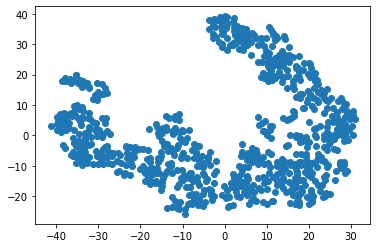

In [92]:
# Visualize the clusters
plt.scatter(X['x'], X['y'])
plt.show()

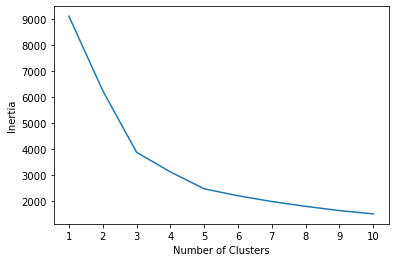

In [93]:
# plot the elbow to evaluate where the k is
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [94]:
# Predicting clusters with k=5

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)

# Add the predicted class column to the dataframe
pcs_df["class"] = model.labels_
pcs_df.head()

,PC 1,PC 2,PC 3,class
0,-1.627708,0.255565,-0.106131,0
1,-2.004766,-1.195504,2.922459,0
2,-1.201275,-1.463926,-0.285931,0
3,3.232372,-2.151150,-0.206274,2
4,-2.130789,-0.547369,2.228227,0


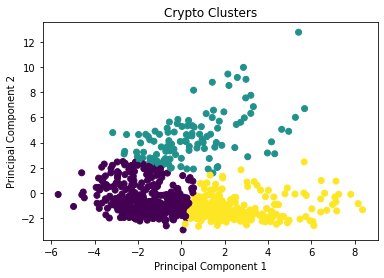

In [95]:
# Visualize the clusters
plt.scatter(x=pcs_df['PC 1'], y=pcs_df['PC 2'], c=pcs_df['class'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Crypto Clusters')
plt.show()